# Overview

This week we'll talk about advanced network measures (beyond the degree distribution), and communities.

* Properties of the full philosopher network, including the importance of age in philosophy
* Properties of the branches of philosophy
* Are the branches communities?
* Community detection in the full philosopher network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in Chapter 7\.
> 

We will use the philosopher age more below.

## Part A: The structure of the Philosopher network

> **_Video lecture_**: Network measures.


In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("0uAYpOqVHCU",width=800, height=450)

> _Exercises_: Structure of the the philosopher network 
> 
> Last time, we found the most connected philosophers (using degree centrality). Now let's dig in and try to understand more about the philosopher network using more advanced network features. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).
> 
> * Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.

In [81]:
# import all necessary packages
from collections import Counter
from __future__ import division
import json
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import operator
import pickle
import pprint
import re
import requests

# IPython specifics
%matplotlib inline

In [3]:
# recreate the network

# get data dictionary
directory = 'philosophers'
with open('{0}/dat.pkl'.format(directory), 'rb') as f:
    dat = pickle.load(f)

# create one node per philosopher name (keys of data)
p_graph = nx.DiGraph()
p_graph.add_nodes_from(dat.keys()) 

In [4]:
# create node links
for p in dat:
    p_content = dat[p]
    # find all wiki links in the content
    p_links = re.findall(r'\[\[(.+?)\]\]', p_content)
    # list with all outgoing links for edges
    # decode unicode chars and clean the link for matching
    out_links = [l.decode('unicode-escape').split('|')[0].replace(' ', '_') for l in p_links]

    # intersection between all philosophers and found links in article
    all_edges = set(dat.keys()).intersection(out_links)
    # show example of related philosophers
    if p == 'Immanuel_Kant':
        pprint.pprint(all_edges)

    # add an edge for the philosopher
    for e in all_edges:
        p_graph.add_edge(p, e)

set([u'Adam_Smith',
     u'Alexander_Gottlieb_Baumgarten',
     u'Aristotle',
     u'Arthur_Schopenhauer',
     u'August_Wilhelm_Schlegel',
     u'Baruch_Spinoza',
     u'Bertrand_Russell',
     u'C._D._Broad',
     u'Charles_Sanders_Peirce',
     u'Christian_Wolff_(philosopher)',
     u'Christine_Korsgaard',
     u'David_Hilbert',
     u'David_Hume',
     u'Derek_Parfit',
     u'Epicurus',
     u'Friedrich_Nietzsche',
     u'Friedrich_Wilhelm_Joseph_von_Schelling',
     u'Georg_Simmel',
     u'Georg_Wilhelm_Friedrich_Hegel',
     u'Gilles_Deleuze',
     u'Gottfried_Leibniz',
     u'Gotthold_Ephraim_Lessing',
     u'Houston_Stewart_Chamberlain',
     u'Jean-Jacques_Rousseau',
     u'Jean_Piaget',
     u'Johann_Gottfried_Herder',
     u'John_Locke',
     u'John_McDowell',
     u'John_Rawls',
     u'Joxe_Azurmendi',
     u'J\xfcrgen_Habermas',
     u'Martin_Heidegger',
     u'Michel_Foucault',
     u'Nicolai_Hartmann',
     u'Noam_Chomsky',
     u'P._F._Strawson',
     u'Plato',
     u'R

In [5]:
# create undirected version
p_graph_undir = p_graph.to_undirected()

> * Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?

In [6]:
node_dict = nx.betweenness_centrality(p_graph_undir) 
#print Counter(node_dict).most_common(5) # use to print with betweenness_centrality

# just print the philosophers, from 1 (most central) to 5 (less central in top 5)
print sorted(node_dict, key=node_dict.get, reverse=True)[:5]

[u'Aristotle', u'Immanuel_Kant', u'Bertrand_Russell', u'Plato', u'David_Hume']


Betweenness centrality indicates the centrality of a node (philosopher) in the network. It is equal to the number of shortest paths from all vertices to all others that pass through that node. Philosophers with a high BC act as a intermediary scholar who boosts the communication between other scholars. Perhaps they wrote multiple literature, or developed core theories.

> * Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?

In [7]:
### eigenvector centrality
# in-edges
node_in_eigen = nx.eigenvector_centrality(p_graph)
# For out-edges eigenvector centrality first reverse the graph with G.reverse().
node_out_eigen = nx.eigenvector_centrality(p_graph.reverse())

print "5 most central philosophers according to in-edges eigenvector centrality:"
print sorted(node_in_eigen, key=node_in_eigen.get, reverse=True)[:5]
print "\nFor comparison:"
print "out-edges eigenvector centrality: ", sorted(node_out_eigen, key=node_out_eigen.get, reverse=True)[:5]

### degree centrality
# in-edges
node_in_degree = nx.degree_centrality(p_graph)
# out-edges
node_out_degree = nx.degree_centrality(p_graph.reverse())

print "in-edges degree centrality: ", sorted(node_in_degree, key=node_in_degree.get, reverse=True)[:5]
print "out-edges degree centrality: ", sorted(node_out_degree, key=node_out_degree.get, reverse=True)[:5]

5 most central philosophers according to in-edges eigenvector centrality:
[u'Immanuel_Kant', u'Aristotle', u'Bertrand_Russell', u'Plato', u'Friedrich_Nietzsche']

For comparison:
out-edges eigenvector centrality:  [u'Georg_Wilhelm_Friedrich_Hegel', u'Martin_Heidegger', u'Friedrich_Nietzsche', u'Immanuel_Kant', u'Michel_Foucault']
in-edges degree centrality:  [u'Immanuel_Kant', u'Aristotle', u'Bertrand_Russell', u'Plato', u'Friedrich_Nietzsche']
out-edges degree centrality:  [u'Immanuel_Kant', u'Aristotle', u'Bertrand_Russell', u'Plato', u'Friedrich_Nietzsche']


How is eigenvector centrality difference from degree centrality:
* Out-edges eigenvector centrality result shows a different behavior from either degree centrality.
* Eigenvector centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. The difference between in- and out-edges is just the direction in the directed graph. We can remember that Hegel had the most out-egdes and Kant the most in-edges in week 4.
* Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree.

Comparison of eigenvector centrality to betweenness centrality:
* Kant and Aristole switch the first place in betweenness centrality.
* Nietzsche takes the 5th spot with eigenvector centrality compared to David Hume in betweenness centrality.
* Betweenness is a centrality measure of a vertex within a graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.
* Out-edges eigenvector centrality accounts for the 'importance' of a node by taking into account the 'importance' of nodes to which it points. So it takes more into account than the betweenness centrality.
* So Aristotle maybe builds the most bridges with other philosophers (thus is first for betweenness centrality) but Kant builds his paths with the more important philosophers in the network (thus is first for out-edges).

> * Is the _undirected version_ of the graph [assortative with respect do degree](http://networkx.lanl.gov/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer?
> 

In [8]:
print "Graph assortativity:", nx.degree_assortativity_coefficient(p_graph_undir)

Graph assortativity: -0.0716935640247


Assortativity measures the similarity of connections in the graph with respect to the node degree. Since the graph assortativity is negativ I would guess that the connections of nodes with similar node degrees rather differ from each other and have not many similarities in contrast nodes of different degree are more similar. In general positive values indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree.

> _Exercises_: Age and structure in the philosopher network
> 
> Age of the philosophers plays a large role. Socrates/Plato and Aristotle are massive influences on philosophy in millennia subsequent to their birth. Now, let us explore how the birth-year of the philosophers plays a role in shaping the network. We've created a file (`.json` format) which provides the birth year for most of the philosophers. Get it [**here**](https://dl.dropboxusercontent.com/u/153071/02805/philosopher_birth_year.json). In the following, you may use that to get the birth-year for the philosopher. _Note_: It's possible that the list of names in the list of birth-years is not identical to the set of nodes in your network; thus, for the exercises including age, simply work on the [subgraph](http://networkx.lanl.gov/reference/generated/networkx.Graph.subgraph.html) of nodes for which you have age-info.
> 

In [9]:
r = requests.get('https://dl.dropboxusercontent.com/u/153071/02805/philosopher_birth_year.json')
birth_dat = r.json()

> * Create a histogram of the number of philosophers born in every century, starting 500 BC. Describe the plot. Does philosophy seem to have developed at a steady pace - or in a more bursty manner? Are we living in a golden age of philosophy right now? (Use the data & common sense to present an argument for your answer).

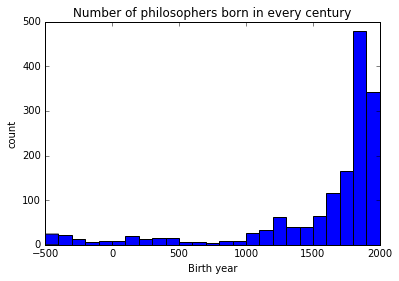

In [10]:
# -500 = 500 before Christi, 25 bins for every century
count, bins, ignored = plt.hist(birth_dat.values(), bins=25, range=(-500, 2000))
plt.title("Number of philosophers born in every century")
plt.xlabel('Birth year')
plt.ylabel('count')
plt.show()

The 20th century from January 1, 1901 to December 31, 2000 had 478 philosophers registered which is the highest. Since the 11th century the number was slowly starting to increase until it got over 100 in the 18th century. In our current century we currently have a 136 philosophers less but on the other hand there is still a lot of time left in the 21st century. So I truly think we are really living in a golden age of philosophy.

> * Is the _undirected version_ of the graph [assortative with respect to age](http://networkx.lanl.gov/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html)? Once again, provide an interpretation of your answer.

In [11]:
# make node names similar
birth_dat = {k.replace(' ', '_'): v for k, v in birth_dat.items()}

# nodes to include for subgraph
node_list = list()
not_found = 0
orig = len(birth_dat)
for p in birth_dat.keys():
    # check if node is in undirected graph
    if p_graph_undir.has_node(p):
        # add valid node for subgraph
        node_list.append(p)
    else:
        # delete the unmatched value
        not_found += 1
        del birth_dat[p]

print '{0} of {1} philosopher\'s with the age attribute from the JSON file could not be found in the network (on wikipedia), {2} remain'.format(
    not_found, orig, len(birth_dat))

# create the subgraph
birthG = nx.subgraph(p_graph_undir, node_list)

# add the age attribute
nx.set_node_attributes(birthG, 'birth_year', birth_dat)

# verify the attribute
#print birthG.node['Immanuel_Kant']['birth_year'], birth_dat['Immanuel_Kant'] # gives both 1724

# compute assortativity for node attributes
print "Assortativity value with respect to age =", nx.attribute_assortativity_coefficient(birthG, 'birth_year')

1216 of 1563 philosopher's with the age attribute from the JSON file could not be found in the network (on wikipedia), 347 remain
Assortativity value with respect to age = -0.00245800609107


Assortativity measures the similarity of connections in the graph with respect to the given attribute. The negative value shows that philosophers age does not correlate with their links.

> * A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.)

In [12]:
# calculate correlation coefficient
x_year, y_degree = list(), list()
for p in birth_dat:
    x_year.append(birth_dat[p])
    # take in-degree with directed graph
    y_degree.append(p_graph.in_degree(p))

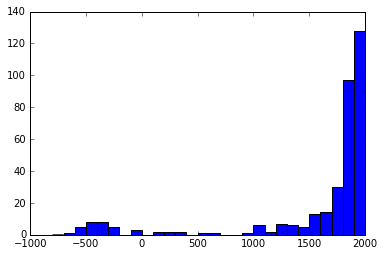

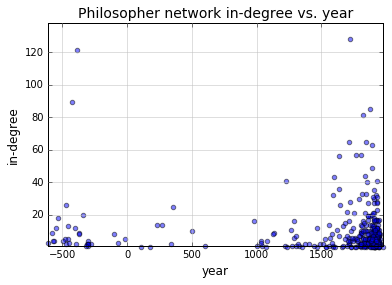

Correlation coefficient between age and degree = -0.0521512871741


In [22]:
# bins with philosophers found reduced
count, bins, ignored = plt.hist(birth_dat.values(), bins=28, range=(-800, 2000))

fig, ax = plt.subplots()

ax.set_title("Philosopher network in-degree vs. year", fontsize=14)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_ylim([1, max(y_degree) + 10])
ax.set_xlim([min(x_year), max(x_year)])

plt.scatter(x_year, y_degree, alpha=0.5, clip_on=False)
plt.show()

print "Correlation coefficient between age and degree =", np.corrcoef(x=x_year, y=y_degree)[0,1]

Philosophers that were born earlier have a slightly higher degree than the others that were born later.

## Part B: The branches of philosophy. Are they communities?

Before we begin, let's learn about communities. If you want to learn more details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the lecture should be enough to get you started. For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 
> 

In [14]:
YouTubeVideo("06GL_KGHdbE",width=800, height=450)

> _Exercises_: We will use the concept of modularity to explore how _community-like_ the six branches of philosophy are.
> 
> * Explain the concept of modularity in your own words.

The strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

> * Now we will calculate the modularity of the branches reported by the Wikipedia editors. But we need to do a bit of work to make this happen.
> * Firstly, modularity does not work when the communities are overlapping. Thus, we need to do something about the philosophers that are part of multiple branches. We will handle it by creating a set of _six new branches_, where we take all of the philosophers that belong to more than one branch and assign them to the branch that they have the most connections to. The procedure is the following:
>   * Start with creating six new branches (e.g. represented as [`set`s](https://docs.python.org/2/library/sets.html) in Python) containing all of the philosopher that can be unambiguously assigned to a branch.
>   * Then, take the list of all nodes that are part of more than one branch. For each member _i_ of this list, how many links _i_ has to each of his/her branches. 
>   * Add _i_ to to the branch that it has most connections to.

In [77]:
# get category dictionary data
with open('{0}/cat.pkl'.format(directory), 'rb') as f:
    cat = pickle.load(f)
# key all not needed
del cat['all']

# list of philosophers in more than one branch
cnt = Counter()
for x in cat:
    for i in cat[x]:
        cnt[i] += 1
p_multi = [x for x in cnt if cnt[x] > 1]

In [78]:
# delete those that occur multiple times
p_single = dict()
for key, val in cat.iteritems():
    p_single[key] = set([x for x in val if x not in p_multi])

# the six branches with philosophers occuring once in branch
for key, val in cat.iteritems():
    print 'Number of all philosophers in {0}: {2} - only in this branch are: {1}'.format(
        key, len(p_single[key]), len(cat[key]))

Number of all philosophers in aestheticians: 126 - only in this branch are: 102
Number of all philosophers in logicians: 271 - only in this branch are: 242
Number of all philosophers in epistemologists: 99 - only in this branch are: 56
Number of all philosophers in ethicists: 272 - only in this branch are: 206
Number of all philosophers in metaphysicians: 96 - only in this branch are: 54
Number of all philosophers in social_and_political_philosophers: 295 - only in this branch are: 233


In [79]:
# how many links does each philosopher i has in branch
p_multi_branch_cnt = dict()
for i in p_multi:
    # get number of edges
    links = nx.edges(p_graph_undir, i)
    # init count 
    p_multi_branch_cnt[i] = {x:0 for x in p_single.keys()}
    # edge list contains (i, other philosopher)
    for l in links:
        # look in what branch
        for key, val in cat.iteritems():
            if l[1] in val:
                p_multi_branch_cnt[i][key] += 1
    # now get the maximum (this ignores the fact that there are ties)
    max_key = max(p_multi_branch_cnt[i].iteritems(), key=operator.itemgetter(1))[0]
    # add the philosopher to branch that it has most connections to
    p_single[max_key].add(i)

In [80]:
test_p = 'Abraham_Joshua_Heschel'
print "An example of link list for {0}: {1}".format(test_p, nx.edges(p_graph_undir, test_p))
print "\nCounts of this philosopher in each branch:", p_multi_branch_cnt[test_p]
if test_p in p_single['ethicists'] and test_p not in p_single['social_and_political_philosophers']:
    print "\nPhilosopher appears only in ethicists list."

An example of link list for Abraham_Joshua_Heschel: [('Abraham_Joshua_Heschel', u'Martin_Luther_King,_Jr.'), ('Abraham_Joshua_Heschel', u'Martin_Buber'), ('Abraham_Joshua_Heschel', u'Maimonides')]

Counts of this philosopher in each branch: {'aestheticians': 0, 'logicians': 0, 'epistemologists': 0, 'ethicists': 3, 'metaphysicians': 0, 'social_and_political_philosophers': 1}

Philosopher appears only in ethicists list.


> * Now that we have a new set of non-overlapping branches, we can calculate the modularity, described in the _Network Science_ book, section 9.4). Use **equation 9.12** in the book to calculate the modularity _M_ of the branches-partitioning. 

$$ M = \sum_{c=1}^{n_c} \bigg[\frac{L_c}{L} - \Big(\frac{k_c}{2L}\Big)^2\bigg] $$

In [85]:
### page 383 in Network Science book
# total edges
L = nx.number_of_edges(p_graph_undir)
M = 0

# set of non-overlapping branches
for category, phil in p_single.iteritems():
    edges_branch = nx.edges(p_graph_undir, phil)
    
    # sum for links of current edge that are also in branch (in community)
    L_c = sum(1 for edge in edges_branch if edge[1] in phil)
    
    # sum for links of current edge that are not in branch (other communities)
    k_c = sum(1 for edge in edges_branch if edge[1] not in phil)

    in_c = L_c/L
    other_c = pow(k_c/(2*L), 2)
    M_c = in_c-other_c
    print category, M_c
    M += M_c
    
print "Modularity of philosopher graph is:", M  

aestheticians 0.0134940311239
logicians 0.141064240007
epistemologists 0.00771691778771
ethicists 0.0869479217458
metaphysicians 0.00968300475915
social_and_political_philosophers 0.173774899181
Modularity of philosopher graph is: 0.432681014605


> * Comment on the value of _M_. Are the branches good communities? (We will explore this question in depth below.)

Higher modularity implies better partitioning so the corresponding community structure for our network is dense in one community but sparse between nodes in different communities.

## Part C: Community detection in the full philosopher network.

> _Exercises_: As a final exercise, we will now run community detection on the full philosopher network. 
> 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?
>   * \[**Note**: It is best if you install the package, instructions are [here](https://bitbucket.org/taynaud/python-louvain) ... make sure that you install it using the Anaconda `python` command\]. 

> * Compare the communities found by your algorithm with the branches of philosophy by creating a matrix **_D_** with dimension (_B_ times _C_), where _B_ is the number of branches and _C_ is the number of communities. We set entry _D_(_i_,_j_) to be the number of nodes that branch _i_ has in common with community _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

## Part D: Properties of individual branches of philosophy

**_This part is optional!_** But I recommend that you work through it anyway - it is probably the exercise that will teach you the most about philosophy.

> _Exercises_: Understanding the branches of philosophy. You already know a lot about network analysis, so in this assignment I'm providing fewer details on what I want you to do: Figuring out what things to calculate in order to provide an awesome quantitative answer to my questions is part of the assignment. That way you can show that you're able to use the skills you've acquired up till now.
> 
> * Perform an centrality analysis of each of the six branches of philosophy knowing what you've just learned about _centrality_ in complex networks. Use your analysis to reveal the identity of the most important figures in each branch of philosophy. 

> * Each of the six branches has its own unique history. Use histograms (and/or whatever else you can think of) to reveal the temporal differences and similarities between the six branches of philosophy.
>